In [3]:
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import itertools


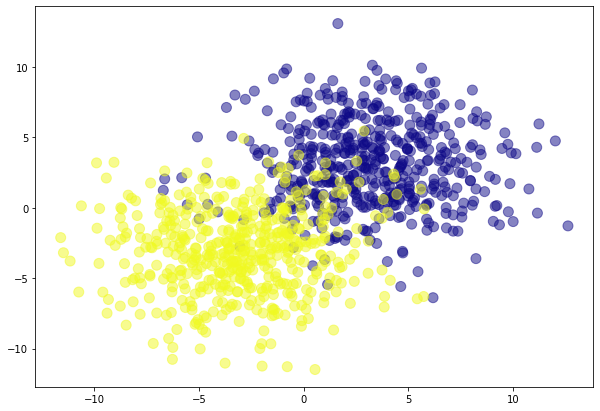

In [25]:
#Class 1
mean = [3,3]
cov = [[10,0],
       [0,10]] 
Class1 = np.random.multivariate_normal(mean,cov,500)

#print(Class1)

#print(Class1)

mean = [-3,-3]
cov = [[10,0],
       [0,10]] 
Class2 = np.random.multivariate_normal(mean,cov,500)

# mean = [-5,5]
# cov = [[5,0],
#        [0,5]] 
# Class3 = np.random.multivariate_normal(mean,cov,500)


X = np.vstack([Class1, Class2])

# Y = np.array([0]*500 + [1]*500 + [2]*500)
Y = np.array([0]*500 + [1]*500)
#print(Y)

one_hot_labels = np.zeros((1000, 2))

for i in range(1000):
    one_hot_labels[i, Y[i]] = 1

plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
plt.show()

In [26]:
# X_train = feature_set;
# Y_train = labels;

model = Sequential()
model.add(Dense(2, activation = 'relu')) # input layer requires input_dim param
model.add(Dense(16, activation = 'relu'))
#model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='softmax'))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)
Y_tt = Y_test
Y_train = to_categorical(Y_train)
print(Y_train.shape)
Y_test = to_categorical(Y_test)


(700, 2) (700,)
(300, 2) (300,)
(700, 2)


In [27]:
e = 100
obj = model.fit(X_train, Y_train, epochs = e, shuffle = True, verbose=2)

scores = model.evaluate(X_test, Y_test)

#print(model.metrics_names[0], model.metrics_names[1])

#lossValues = np.array

Epoch 1/100
22/22 - 0s - loss: 0.7442 - accuracy: 0.4257
Epoch 2/100
22/22 - 0s - loss: 0.6680 - accuracy: 0.6814
Epoch 3/100
22/22 - 0s - loss: 0.6186 - accuracy: 0.8014
Epoch 4/100
22/22 - 0s - loss: 0.5813 - accuracy: 0.8200
Epoch 5/100
22/22 - 0s - loss: 0.5483 - accuracy: 0.8314
Epoch 6/100
22/22 - 0s - loss: 0.5169 - accuracy: 0.8429
Epoch 7/100
22/22 - 0s - loss: 0.4878 - accuracy: 0.8671
Epoch 8/100
22/22 - 0s - loss: 0.4600 - accuracy: 0.8857
Epoch 9/100
22/22 - 0s - loss: 0.4349 - accuracy: 0.9043
Epoch 10/100
22/22 - 0s - loss: 0.4119 - accuracy: 0.9043
Epoch 11/100
22/22 - 0s - loss: 0.3925 - accuracy: 0.9057
Epoch 12/100
22/22 - 0s - loss: 0.3762 - accuracy: 0.9100
Epoch 13/100
22/22 - 0s - loss: 0.3629 - accuracy: 0.9114
Epoch 14/100
22/22 - 0s - loss: 0.3523 - accuracy: 0.9100
Epoch 15/100
22/22 - 0s - loss: 0.3433 - accuracy: 0.9086
Epoch 16/100
22/22 - 0s - loss: 0.3356 - accuracy: 0.9071
Epoch 17/100
22/22 - 0s - loss: 0.3283 - accuracy: 0.9071
Epoch 18/100
22/22 - 0s

In [29]:
Loss = np.array(obj.history["loss"])
Epoch = np.arange(e)
Accuracy = np.array(obj.history["accuracy"])
#print(Loss, Epoch, Accuracy)

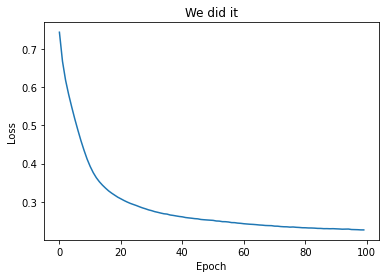

In [30]:
plt.plot(Epoch, Loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("We did it")
plt.show()

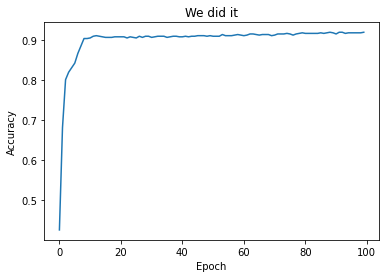

In [31]:
plt.plot(Epoch, Accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("We did it")
plt.show()

In [32]:
print(f'Test results - Loss: {scores[0]} - Accuracy: {scores[1]*100}%')

# Plot decision boundary

#print(X_test)
# print(Y_test)
# print(Y_tt)
#Y_test = Y_test.astype(np.int_)
# X_testing = X[:training_split, :]
# Targets_testing = Y[:training_split]

# Plot decision boundary
plot_decision_regions(X_test, Y_test, clf=model, legend=2)
plt.show()

Test results - Loss: 0.2344563752412796 - Accuracy: 90.66666960716248%


ValueError: y must be an integer array. Found float32. Try passing the array as y.astype(np.int_)

https://androidkt.com/set-custom-weights-keras-using-numpy-array/ 
###### To change weights for the new model
###### Add timer
